# LINEAR REGRESSION

Details:

- time_seconds = time spent on website
- age = Their age
- browser = Chrome or Safari


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
website = pd.read_csv('website.csv')
website.head()

,time_seconds,age,browser
0,486.0,47.1,Safari
1,645.7,64.6,Chrome
2,345.0,45.4,Safari
3,413.4,34.4,Chrome
4,426.4,31.3,Safari


`time_seconds vs. age`

<function matplotlib.pyplot.show(close=None, block=None)>

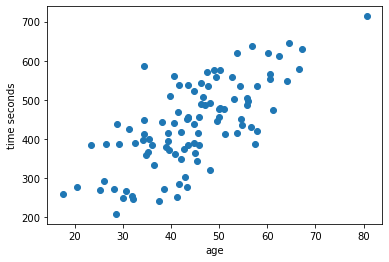

In [19]:
plt.scatter(website.age, website.time_seconds)
plt.xlabel('age')
plt.ylabel('time seconds')
plt.show


### Linear model to predict<font color="red"> predict time_seconds </font>using the <font color="red"> age </font> variable

In [20]:
model =sm.OLS.from_formula('time_seconds ~ age', data = website)
results = model.fit()
results.params

Intercept    128.967945
age            6.913758
dtype: float64

`Intercept` 
 - The expected value of the outcome variable when the predictor is equal to zero
 - When age is 0 then time_seconds is 128.96

`Slope`
 - The expected difference in the outcome variable for a one unit difference in the predictor variable
 - 1 age is equal to time_second 6.91

y = mx+b.

- y and x are variables
- m represent the slope
- b is the y-intercept of the line


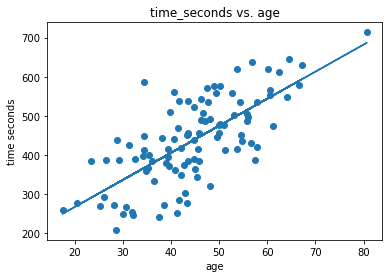

In [27]:
plt.scatter(website.age, website.time_seconds)
plt.title('time_seconds vs. age')
plt.xlabel('age')
plt.ylabel('time seconds')

plt.plot(website.age, results.params[0] + results.params[1]*website.age)

In [25]:
# Calculate fitted values
fitted_values = results.predict(website)
fitted_values.head()

0    454.605928
1    575.596686
2    442.852540
3    366.801206
4    345.368558
dtype: float64

In [26]:
# Calculate residuals
residuals = website.time_seconds - fitted_values
residuals.head()

0    31.394072
1    70.103314
2   -97.852540
3    46.598794
4    81.031442
dtype: float64

### `Checking the normality assumption`

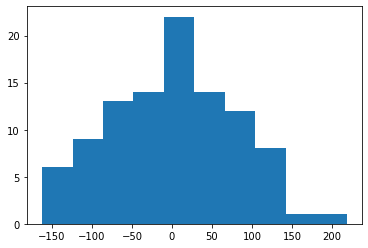

In [29]:
plt.hist(residuals)
plt.show()
# this is normally distributed

### `Checking the homoscedasticity assumption`

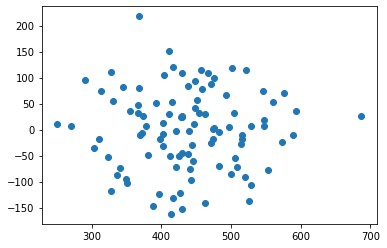

In [31]:
plt.scatter(fitted_values, residuals)
plt.show()
# Were satisfied with the graph

### `1. Predict the amount of time that a 40 year old person will spend on the website.`

In [37]:
time_spent_40years_old =  results.params[0] + results.params[1]*40
time_spent_40years_old

405.51824893244964


### Linear model to predict<font color="red"> predict time_seconds </font>using the <font color="red"> browser </font> variable

In [38]:
model =sm.OLS.from_formula('time_seconds ~ age', data = website)
results = model.fit()
results.params

Intercept    128.967945
age            6.913758
dtype: float64

In [46]:
# Calculate means for each browser
website.groupby('browser').mean().time_seconds

browser
Chrome    489.704255
Safari    390.647170
Name: time_seconds, dtype: float64

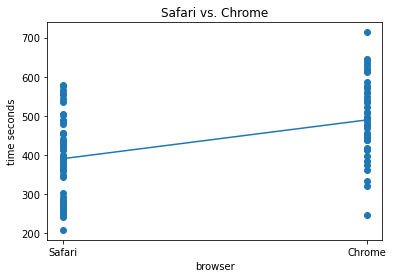

In [49]:
plt.scatter(website.browser, website.time_seconds)
plt.plot([0,1],[ 390.64, 489.70])
plt.title('Safari vs. Chrome')
plt.xlabel('browser')
plt.ylabel('time seconds')
# plt.show()



plt.show()
